In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data_csv_out/data.csv')
df

,Unnamed: 0,clouds,visibility,wind_speed,wind_deg,weather_main,weather_desc,month,hour_stan,week,...,dewpoint_seasonal,dewpoint_residual,feelslike_trend,feelslike_seasonal,feelslike_residual,temp_w_seas,pressure_w_seas,humidity_w_seas,dewpoint_w_seas,feelslike_w_seas
0,0,20,1.000000,3.09,0.500000,Rain,light rain,9,0.521739,0.692308,...,0.001023,-0.023656,0.435091,0.026390,0.231257,0.696208,1.157128,0.294338,0.487171,0.711019
1,1,20,1.000000,3.09,0.500000,Rain,light rain,9,0.565217,0.692308,...,-0.002030,-0.023893,0.448068,0.017993,0.226677,0.693396,0.671523,0.294109,0.485685,0.705202
2,2,20,1.000000,4.12,0.500000,Clouds,few clouds,9,0.608696,0.692308,...,-0.000234,-0.029258,0.459614,0.013944,0.219180,0.688641,0.167482,0.296242,0.486560,0.702397
3,3,20,1.000000,3.09,0.583333,Clouds,few clouds,9,0.652174,0.692308,...,0.002323,-0.048226,0.469728,0.009536,0.244200,0.733943,-0.348449,0.249143,0.474446,0.730362
4,4,20,1.000000,3.09,0.583333,Clouds,few clouds,9,0.695652,0.692308,...,0.005053,-0.055162,0.478876,0.003338,0.240132,0.729424,-0.855486,0.251519,0.475242,0.724758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,6820,20,1.000000,3.09,0.805556,Clouds,few clouds,6,0.782609,0.442308,...,0.005053,0.033750,0.315154,0.003338,0.113044,0.419342,-0.855486,0.570110,0.529315,0.475885
5956,6822,20,1.000000,2.57,0.777778,Clouds,few clouds,6,0.869565,0.442308,...,-0.001837,0.033750,0.315154,-0.013270,0.113044,0.313595,-0.345158,0.656013,0.516325,0.342324
5957,6823,20,0.882353,2.06,0.916667,Rain,light rain,6,0.913043,0.442308,...,-0.003756,0.033750,0.315154,-0.023656,0.113044,0.311938,-0.347791,0.657352,0.515333,0.338720
5958,6824,20,1.000000,1.03,0.000000,Rain,light rain,6,0.956522,0.442308,...,-0.005153,0.033750,0.315154,-0.029142,0.113044,0.279728,0.708353,0.723899,0.534742,0.305359


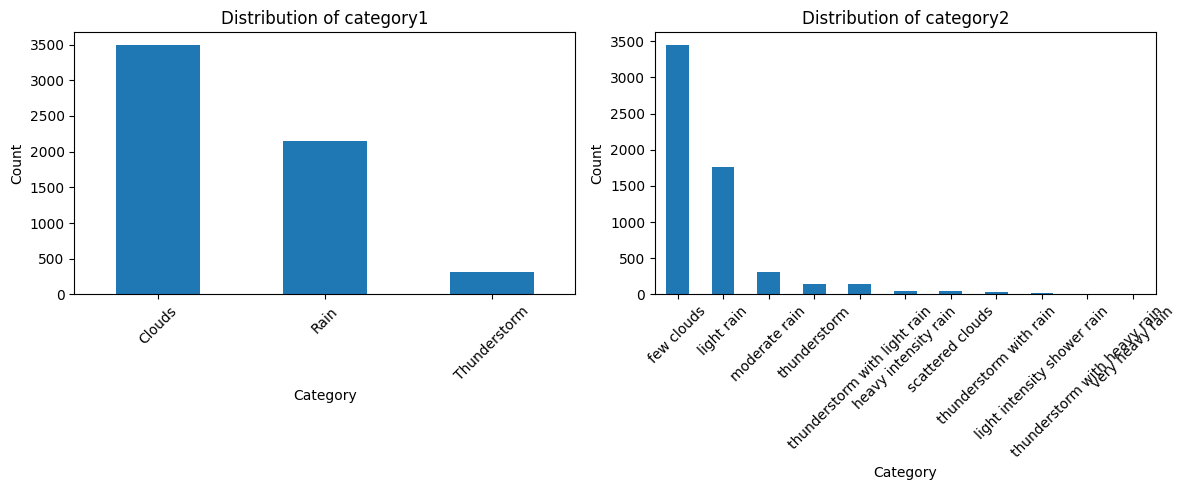

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Example categorical columns: 'category1', 'category2'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
df['weather_main'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of category1')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Second subplot
df['weather_desc'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution of category2')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [3]:
count1 = df['weather_main'].value_counts().reset_index()
count1.columns = ['weather_main', 'Count1']

count2 = df['weather_desc'].value_counts().reset_index()
count2.columns = ['weather_desc', 'Count2']

print("weather_main Count:\n", count1)
print("\nweather_desc Count:\n", count2)


weather_main Count:
    weather_main  Count1
0        Clouds    3497
1          Rain    2147
2  Thunderstorm     316

weather_desc Count:
                     weather_desc  Count2
0                     few clouds    3449
1                     light rain    1763
2                  moderate rain     317
3                   thunderstorm     139
4   thunderstorm with light rain     138
5           heavy intensity rain      49
6               scattered clouds      48
7         thunderstorm with rain      33
8    light intensity shower rain      14
9   thunderstorm with heavy rain       6
10               very heavy rain       4


In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=3,random_state=42)
X = df.drop(['weather_main', 'weather_desc'], axis=1)
y = df['weather_desc']
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

print(pd.Series(y_train_resampled).value_counts())

weather_desc
light rain                      3449
few clouds                      3449
thunderstorm                    3449
thunderstorm with rain          3449
moderate rain                   3449
thunderstorm with light rain    3449
heavy intensity rain            3449
scattered clouds                3449
light intensity shower rain     3449
thunderstorm with heavy rain    3449
very heavy rain                 3449
Name: count, dtype: int64


In [13]:
clouds = df[df['weather_main'] == 'Clouds']['weather_desc'].unique()
rain = df[df['weather_main'] == 'Rain']['weather_desc'].unique()
thunder = df[df['weather_main'] == 'Thunderstorm']['weather_desc'].unique()

thunder

array(['thunderstorm', 'thunderstorm with rain',
       'thunderstorm with light rain', 'thunderstorm with heavy rain'],
      dtype=object)

In [2]:
import numpy as np
l1 = ['Clouds', 'Rain', 'Thunderstorm']
l2 = [np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
l3 = [l1[i] for i in l2]
l3

['Thunderstorm', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds']